In [1]:
#import des librairies pour le traitement de la donnée
import pandas as pd
import LondonProject.bilbio_func_class as bb
import LondonProject.Search_Mod_Para as sm
import joblib
%matplotlib inline

E:\Python\Projects\pythonProject\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

#Defition du répertoire de données - ici données à la racine
directory = '' # 
directory = bb.datas_direc +'\\'

In [3]:
#Chargement du dataset sauvegardé
df = pd.read_csv(directory + "\\clean_fire_data_set3.csv", sep=';', index_col=0)

#on peut aussi le crééer à parir des fichiers excel, stocker dans le répertore bb.datas_direc
#en indiquant la liste des fichiers xlsx utiliser : ['\\LFB Incident data from 2018 - November 2024', '\\LFB Incident data from 2009 - 2017',etc...

#df1 = pp.build_training_data_set(bb.datas_direc,bb.list_of_file,
#                         fire_only=True, max_num_call=2, pump_order_max=2, minturnout=10, mintravel=10,
#                         minattendance=30, max_speed=90, max_dist=12, min_dist=0.3, drop_grenfell=True,
#                            maxturnout=180, frm_date='2015-12-31')
print(df.head(5))
df.info()

                                 DateOfCall season  is_week_end day_moment  \
ResourceMobilisationId                                                       
4620744                 2016-01-01 00:03:17  hiver         True      night   
4620746                 2016-01-01 00:04:41  hiver         True      night   
4620745                 2016-01-01 00:04:41  hiver         True      night   
4620751                 2016-01-01 00:07:44  hiver         True      night   
4620754                 2016-01-01 00:10:18  hiver         True      night   

                              IncidentDescription PropertyCategory  PumpOrder  \
ResourceMobilisationId                                                          
4620744                 False alarm - Good intent      Residential          1   
4620746                              Primary Fire      Residential          2   
4620745                              Primary Fire      Residential          1   
4620751                                       AF

In [4]:
# définition de la Variable Cible : TravelTimeSeconds ou AttendanceTimeSeconds
y_var='TravelTimeSeconds'
#Definiton de la cible pour classification et du temps en seconds des intervalles
classif1={'var': 'TravelTimeSeconds', 'cat': [210]}
#classif2 = {'var': 'AttendanceTimeSeconds', 'cat': [288]}


In [5]:
#initialisation des class regression et classification
s = sm.SearchModParaReg(df, y_var)
s2 = sm.SearchModParaClassif(df, classif1)

E:\Python\Projects\pythonProject\LondonProject\Pipeline_Processing.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col_norm] = pd.DataFrame(scaler.fit_transform(X_train[col_norm]), index=X_train.index)
E:\Python\Projects\pythonProject\LondonProject\Pipeline_Processing.py:286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col_norm] = pd.DataFrame(scaler.transform(X_test[col_norm]), index=X_test.index)
E:\Python\Projects\pythonProject\LondonProject\Pipeline_Processing.py:285: SettingWithC

In [6]:
#liste des modeles de régression 
print ("Liste des regresseurs", list(s.regresseur.keys()))


Liste des regresseurs ['lgbm', 'gbr', 'xgb']


In [7]:
#Load des données de Regression. Si best_modele non sauvegardé, on l'estime et on le sauve 
reg = list(s.regresseur.keys())[0]
try:
    para_reg = joblib.load(directory + f'para_{reg}_reg_{s.y_var}.pkl')
    mod_reg = joblib.load(directory + f'mod_{reg}_reg_{s.y_var}.pkl')
except:
    print(f"Paramètre du modele  {reg} pour la variable {s.y_var} non sauvegardé, patience on les calculs")
    para_reg, mod_reg = s.search_par(reg)
    joblib.dump(para_reg, directory + f'para_{reg}_reg_{s.y_var}.pkl')
    joblib.dump(mod_reg, directory + f'mod_{reg}_reg_{s.y_var}.pkl')
sm.print_mod_info(s, mod_reg, para_reg, True)

0 0
(421889, 25) (105473, 25) (421889,) (105473,)
Meilleurs paramètres : {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 750, 'num_leaves': 20}
MSE sur le jeu de test : 2597.048867865433
Coefficient de détermination du modèle : 0.5793224579072281
R² : 0.587
RMSE : 50.961
MAE : 39.543


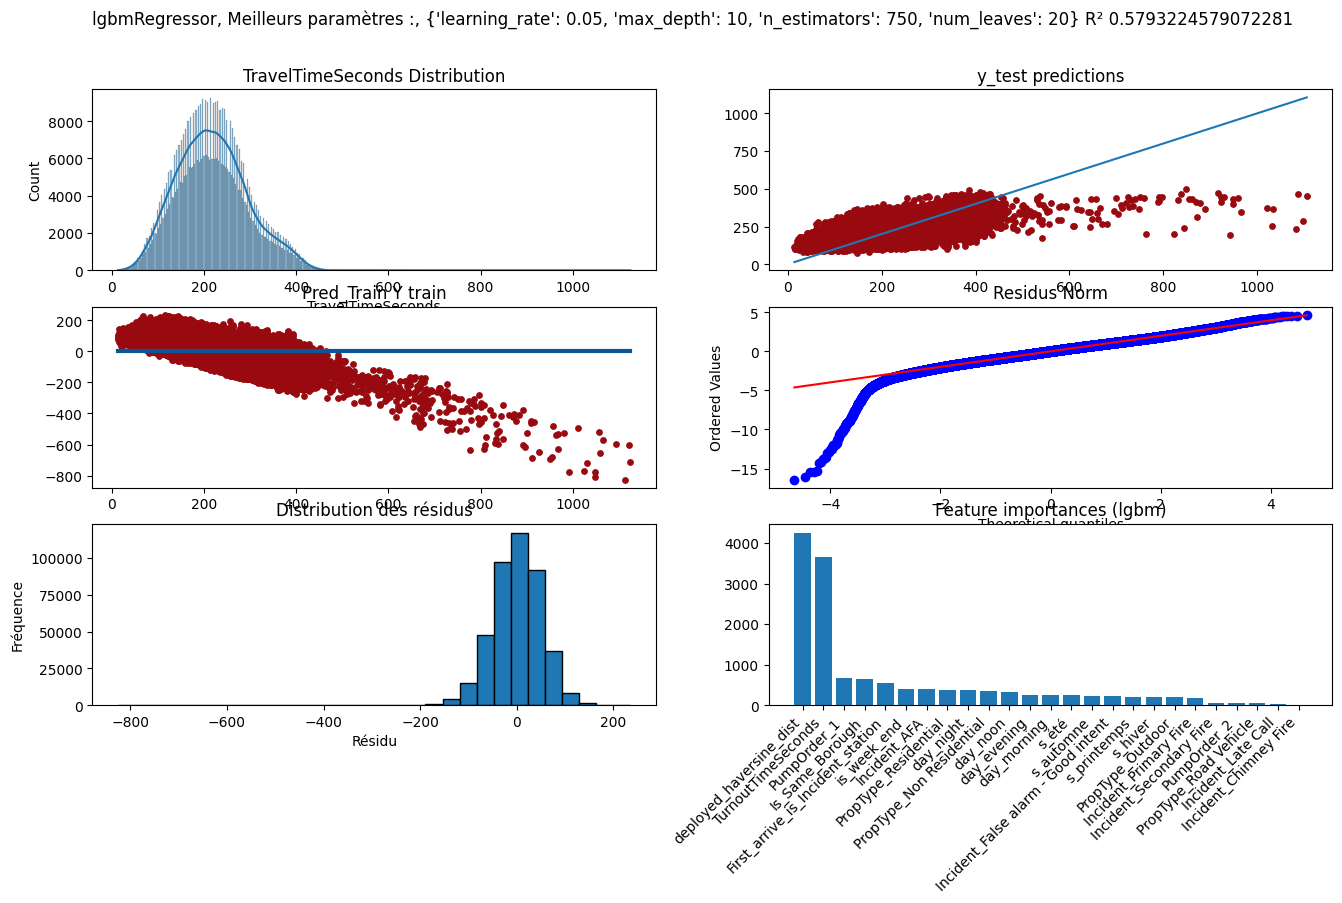

In [8]:
#plot de la regression
sm.plot_best_reg(s, mod_reg, para_reg, reg)

In [9]:
#estimation de la régression pour un point donné
sm.print_mod_prediction(s, mod_reg, reg=True, iloc_number=2249)

intervention : 6409689 le  2023-07-08 20:06:41  temps intervention 371.0 Le temps prédit : 362.30771805877725


In [10]:
print("Liste des modèles de classification", list(s2.classif.keys()))

Liste des modèles de classification ['lgbm', 'logreg']


In [11]:
classif = list(s2.classif.keys())[0]
try:
    para_classif = joblib.load(directory + f'para_{classif}_classif_{s.y_var}.pkl')
    mod_classif = joblib.load(directory + f'mod_{classif}_classif_{s.y_var}.pkl')
except:
    print(f"Paramètre du modele  {classif} pour la variable {s.y_var} non sauvegardé, patience on les calculs")
    para_classif, mod_classif = s2.search_par(classif)
    joblib.dump(para_classif, directory + f'para_{classif}_classif_{s.y_var}.pkl')
    joblib.dump(mod_classif, directory +f'mod_{classif}_classif_{s.y_var}.pkl')

sm.print_mod_info(s2, mod_classif, para_classif, False)

0 0
(421889, 25) (105473, 25) (421889,) (105473,)
Meilleurs paramètres : {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


E:\Python\Projects\pythonProject\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Accuracy : 0.7840964038189868
Rapport de classification :
               precision    recall  f1-score   support

          c1       0.76      0.79      0.77     48850
          c2       0.81      0.78      0.79     56623

    accuracy                           0.78    105473
   macro avg       0.78      0.78      0.78    105473
weighted avg       0.79      0.78      0.78    105473



E:\Python\Projects\pythonProject\venv\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


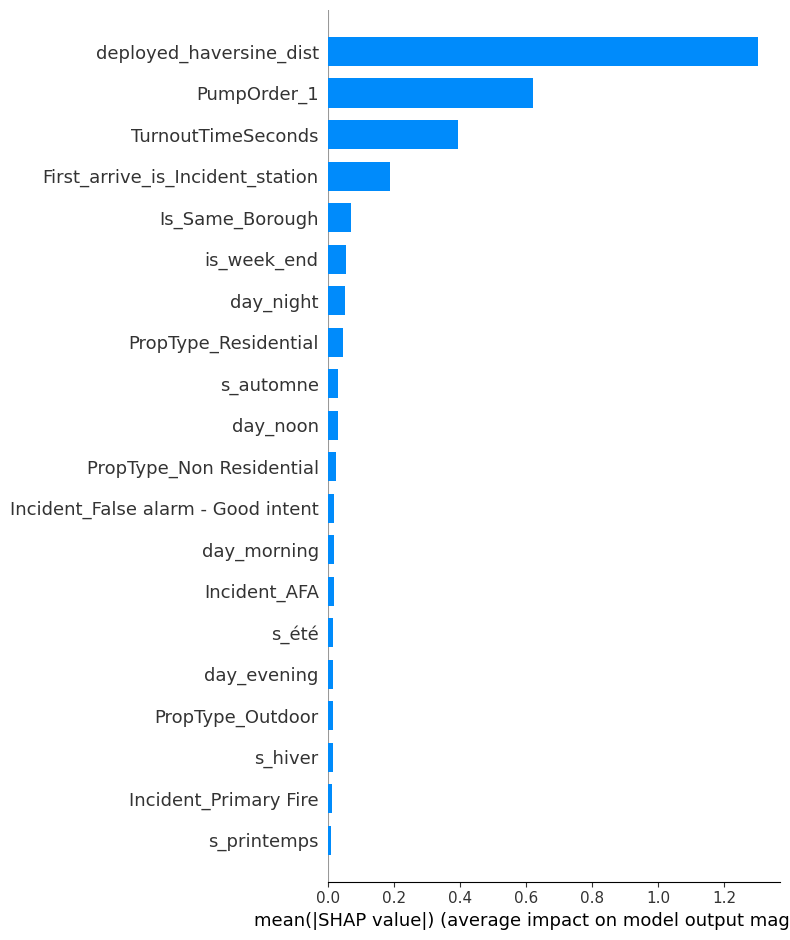

In [16]:
sm.plot_best_class_explainer(s2, mod_classif, False)

In [13]:
sm.print_mod_prediction(s2, mod_classif,reg=False, iloc_number=2249)

intervention : 6409689 le  2023-07-08 20:06:41  temps intervention c2 Classe prédite : c2


Classe prédite : ['c2']


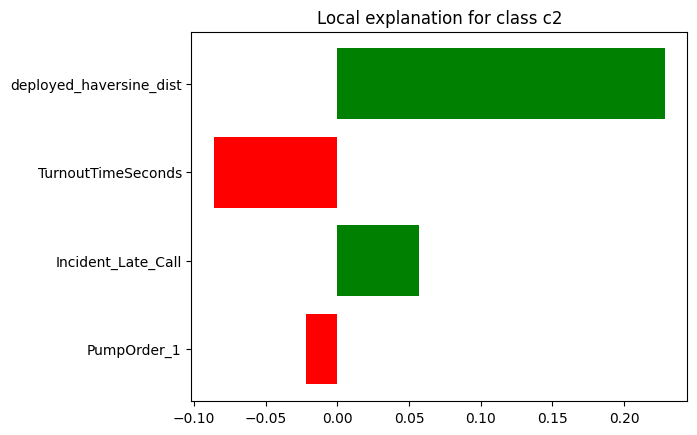

In [14]:
sm.plot_explain_class(s2, mod_classif,  iloc_number=7249)